In [6]:
import pandas as pd
import seaborn as sns
results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4)).subtract(20) 
results.head()
sns.set()
results = results[results.seed_size == 20]
print(results.columns)
results.head()

Index(['network_name', 'threshold', 'seed_size', 'budget_total', '0_no_block',
       '1_no_block', '2_no_block', '3_no_block', '0_cbh', '1_cbh', '2_cbh',
       '3_cbh', '0_degree', '1_degree', '2_degree', '3_degree',
       'total_no_block', 'total_cbh', 'total_degree'],
      dtype='object')
    network_name  threshold  seed_size  budget_total  0_no_block  1_no_block  \
165         wiki          2         20            70      2284.0         0.0   
166         wiki          2         20           141      2284.0         0.0   
167         wiki          2         20           211      2284.0         0.0   
168         wiki          2         20           282      2284.0         0.0   
169         wiki          2         20           353      2284.0         0.0   
170         wiki          2         20           423      2284.0         0.0   
171         wiki          2         20           494      2284.0         0.0   
172         wiki          2         20           565      2284.0

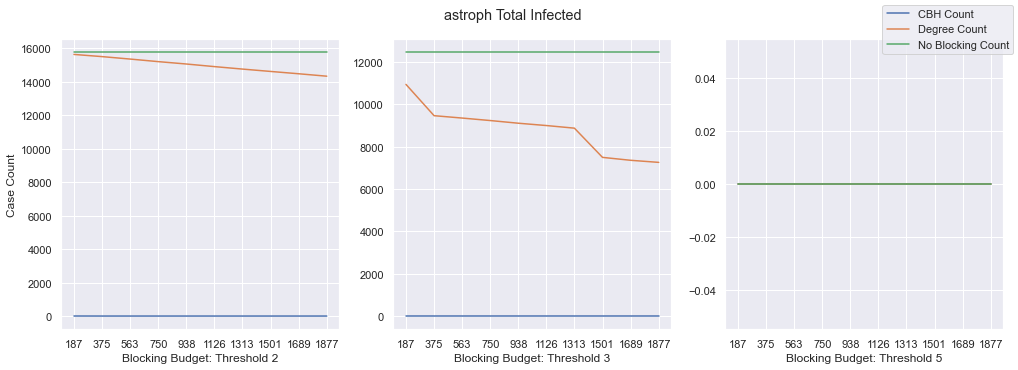

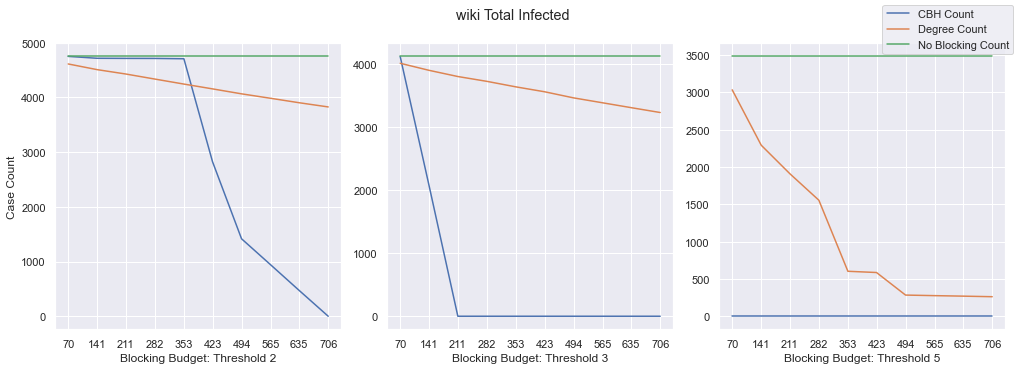

In [3]:
import matplotlib.pyplot as plt
import numpy as np
names = ['astroph', 'wiki']
thres = [2, 3, 5]

for name in names:
    threshold = results[results.network_name == name]
    fig, ax = plt.subplots(1,3, figsize=(14, 5))
    fig.suptitle(name + " Total Infected")
#        threshold = threshold[threshold.seed_size == 10]
    my_range = np.arange(0, int(threshold.total_no_block.max()), int(threshold.total_no_block.max()) // 5)
    for i in range(len(thres)):
        subdf = threshold[threshold.threshold == thres[i]]
        cbh, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1])
        degree, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1])
        no_block, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1])
        ax[i].set_xticks(list(subdf.budget_total)[:-1])
#         ax[i].set_yticks(my_range)
    fig.tight_layout(pad=1)
    fig.legend([cbh, degree, no_block], ['CBH Count', "Degree Count", "No Blocking Count"])
    for i in range(3):
        ax[i].set_xlabel("Blocking Budget: Threshold " + str(thres[i]))
    ax[0].set_ylabel("Case Count")
    plt.savefig("infected_cnt_" + name + ".pdf")

In [4]:
astroph = results[(results.network_name == "astroph")]

astro_sub_df = astroph[['total_no_block', 'threshold', 'total_degree', 'total_cbh', 'budget_total' ]]
astro_sub_df

,total_no_block,threshold,total_degree,total_cbh,budget_total
99,15792.0,2,15644.0,2.1,187
100,15792.0,2,15513.7,0.0,375
101,15792.0,2,15366.8,0.0,563
102,15792.0,2,15214.3,0.0,750
103,15792.0,2,15071.7,0.0,938
104,15792.0,2,14915.8,0.0,1126
105,15792.0,2,14768.5,0.0,1313
106,15792.0,2,14627.4,0.0,1501
107,15792.0,2,14488.3,0.0,1689
108,15792.0,2,14343.1,0.0,1877
